In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

print(__doc__)
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Automatically created module for IPython interactive environment


In [2]:
def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)

In [3]:
colors = ['red', 'green', 'blue', 'orange']

In [4]:
raw_data = pd.read_csv('C:/Users/Chenming/Desktop/assignment3/Data1_Car/car.csv')
#convert buying to int, 'vhigh'->0, 'high'->1,'med'->2,'low'->3, save to a new dataset: data 
raw_data['buying'] = raw_data.buying.str.replace('vhigh','0')
raw_data['buying'] = raw_data.buying.str.replace('high','1')
raw_data['buying'] = raw_data.buying.str.replace('med','2')
raw_data['buying'] = raw_data.buying.str.replace('low','3')
data=raw_data
data['buying']=raw_data.buying
data['buying']=data.buying.astype(int)

In [5]:
raw_data = pd.read_csv('C:/Users/Chenming/Desktop/assignment3/Data1_Car/car.csv')
#convert buying to int, 'vhigh'->0, 'high'->1,'med'->2,'low'->3, save to a new dataset: data 
raw_data['buying'] = raw_data.buying.str.replace('vhigh','0')
raw_data['buying'] = raw_data.buying.str.replace('high','1')
raw_data['buying'] = raw_data.buying.str.replace('med','2')
raw_data['buying'] = raw_data.buying.str.replace('low','3')
data=raw_data
data['buying']=raw_data.buying
data['buying']=data.buying.astype(int)

In [6]:
#convert maint to int, 'vhigh'->0, 'high'->1,'med'->2,'low'->3, save to a new dataset: data 
raw_data['maint'] = raw_data.maint.str.replace('vhigh','0')
raw_data['maint'] = raw_data.maint.str.replace('high','1')
raw_data['maint'] = raw_data.maint.str.replace('med','2')
raw_data['maint'] = raw_data.maint.str.replace('low','3')
data['maint']=raw_data.maint
data['maint']=data.maint.astype(int)

In [7]:
#convert doors, 5more ->5, all to int
raw_data['doors'] = raw_data.doors.str.replace('5more','5')
data['doors']=raw_data.doors
data['doors']=data.doors.astype(int)

In [8]:
#persons more->5, all to int
raw_data['persons'] = raw_data.persons.str.replace('more','5')
data['persons']=raw_data.persons
data['persons']=data.persons.astype(int)

In [9]:
#lug_boot, small->0, med->1, big->2, all to int
raw_data['lug_boot'] = raw_data.lug_boot.str.replace('small','0')
raw_data['lug_boot'] = raw_data.lug_boot.str.replace('med','1')
raw_data['lug_boot'] = raw_data.lug_boot.str.replace('big','2')
data['lug_boot']=raw_data.lug_boot
data['lug_boot']=data.lug_boot.astype(int)

In [10]:
#safety, low->0, med->1, high->2
raw_data['safety'] = raw_data.safety.str.replace('low','0')
raw_data['safety'] = raw_data.safety.str.replace('med','1')
raw_data['safety'] = raw_data.safety.str.replace('high','2')
data['safety']=raw_data.safety
data['safety']=data.safety.astype(int)

In [11]:
#set label column
data['acceptable_label'] = raw_data.acceptable

In [12]:
#acceptable, unacc->0, acc->1, good->2, vgood->3
raw_data['acceptable'] = raw_data.acceptable.str.replace('unacc','0')
raw_data['acceptable'] = raw_data.acceptable.str.replace('acc','1')
raw_data['acceptable'] = raw_data.acceptable.str.replace('good','2')
raw_data['acceptable'] = raw_data.acceptable.str.replace('v2','3')
data['acceptable']=raw_data.acceptable
data['acceptable']=data.acceptable.astype(int)
data.head()

,buying,maint,doors,persons,lug_boot,safety,acceptable,acceptable_label
0,0,0,2,2,0,0,0,unacc
1,0,0,2,2,0,1,0,unacc
2,0,0,2,2,0,2,0,unacc
3,0,0,2,2,1,0,0,unacc
4,0,0,2,2,1,1,0,unacc


In [13]:
data_label = data.drop(['buying','maint','doors','persons','lug_boot','safety'], axis=1)

datalist_label = data.acceptable.values
datalist_label_names = np.array(['unacc','acc','good','vgood'])
datalist = data.drop(['acceptable','acceptable_label'], axis=1)
datalist_array = datalist.values
data_label.head()

,acceptable,acceptable_label
0,0,unacc
1,0,unacc
2,0,unacc
3,0,unacc
4,0,unacc


In [14]:
# Break up the dataset into non-overlapping training (75%) and testing
# (25%) sets.
skf = StratifiedKFold(n_splits=4)
# Only take the first fold.
train_index, test_index = next(iter(skf.split(datalist_array, datalist_label)))
X_train = datalist_array[train_index]
y_train = datalist_label[train_index]
X_test = datalist_array[test_index]
y_test = datalist_label[test_index]

n_classes = len(np.unique(y_train))

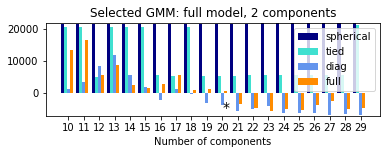

In [15]:
#Get the best K
import itertools
from scipy import linalg
import matplotlib as mpl

from sklearn import mixture

# Number of samples per component
#n_samples = 500

# Generate random sample, two components
#np.random.seed(0)
#C = np.array([[0., -0.1], [1.7, .4]])
#X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
#         .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]

lowest_bic = np.infty
bic = []
n_components_range = range(10, 30)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X_train)
        bic.append(gmm.bic(X_train))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

plt.xticks()
plt.yticks()
plt.title('Selected GMM: models, components')
plt.subplots_adjust(hspace=.7, bottom=0.01)
plt.show()

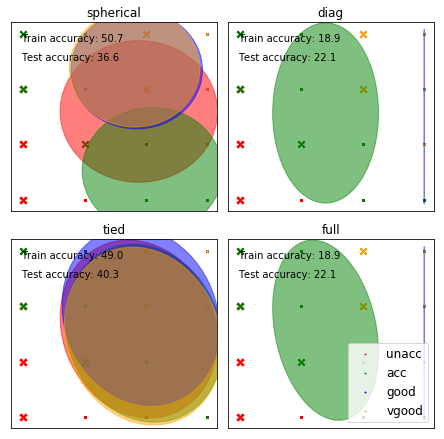

In [16]:
# Try GMMs using different types of covariances. K=4, iteration=200
estimators = dict((cov_type, GaussianMixture(n_components=n_classes,
                   covariance_type=cov_type, max_iter=200, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full'])

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)
for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = datalist_array[datalist_label == n]
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color,
                    label=datalist_label_names[n])
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))


plt.show()

In [31]:
new_component=4
cv_type='full'
# Try GMMs with different K
gmm = mixture.GaussianMixture(n_components=new_component,
                                      covariance_type=cv_type)
gmm.fit(datalist_array)
datalist_pred = gmm.predict(datalist_array)
data_label['K4_label']=datalist_pred

datalist_pred

array([1, 1, 1, ..., 2, 2, 2], dtype=int64)

In [32]:
#compare labels 

tb1 = pd.crosstab(data_label['acceptable_label'],datalist_pred)
#data_label.head()
tb1

col_0,0,1,2,3
acceptable_label,,,,
acc,143,0,104,137
good,0,0,36,33
unacc,271,576,108,255
vgood,0,0,40,25


In [33]:
data_label.head()

,acceptable,acceptable_label,K4_label,K4_label_name,K13_label,K13_label_name,K40_label,K40_label_name
0,0,unacc,1,unacc,4,unacc,14,unacc
1,0,unacc,1,unacc,4,unacc,14,unacc
2,0,unacc,1,unacc,4,unacc,14,unacc
3,0,unacc,1,unacc,4,unacc,21,unacc
4,0,unacc,1,unacc,4,unacc,14,unacc


In [34]:
#assign test K=4 label
def em_K1_label(alpha):
    label_max = max(tb1.iloc[i,alpha] for i in range(4))
    if tb1.iloc[0,alpha] == label_max:
        return 'acc'
    if tb1.iloc[1,alpha] == label_max:
        return 'good'
    if tb1.iloc[2,alpha] == label_max:
        return 'unacc'
    if tb1.iloc[3,alpha] == label_max:
        return 'vgood'
data_label['K4_label_name']=data_label['K4_label'].apply(em_K1_label)
data_label.head()

,acceptable,acceptable_label,K4_label,K4_label_name,K13_label,K13_label_name,K40_label,K40_label_name
0,0,unacc,1,unacc,4,unacc,14,unacc
1,0,unacc,1,unacc,4,unacc,14,unacc
2,0,unacc,1,unacc,4,unacc,14,unacc
3,0,unacc,1,unacc,4,unacc,21,unacc
4,0,unacc,1,unacc,4,unacc,14,unacc


In [35]:
K4_accuracy = len(data_label[data_label['acceptable_label']==data_label['K4_label_name']])/len(data_label)
print('K=4 EM -> {0:.4f}%'.format(K4_accuracy*100))

K=4 EM -> 70.0231%


In [36]:
#K=13
new_component=13
cv_type='full'
# Try GMMs with different K
gmm = mixture.GaussianMixture(n_components=new_component,
                                      covariance_type=cv_type)
gmm.fit(datalist_array)
datalist_pred = gmm.predict(datalist_array)
data_label['K13_label']=datalist_pred

datalist_pred

array([1, 1, 1, ..., 5, 5, 5], dtype=int64)

In [37]:
#compare labels 

tb2 = pd.crosstab(data_label['acceptable_label'],datalist_pred)
#data_label.head()
tb2

col_0,0,1,2,3,4,5,6,7,8,9,10,11,12
acceptable_label,,,,,,,,,,,,,
acc,4,0,4,12,105,2,0,6,0,135,0,12,104
good,0,0,0,0,21,4,0,12,0,24,0,0,8
unacc,23,240,5,66,130,15,138,18,144,72,328,15,16
vgood,0,0,0,0,0,6,0,18,0,25,0,0,16


In [38]:
#assign test K=13 label
def em_K2_label(alpha):
    label_max = max(tb2.iloc[i,alpha] for i in range(4))
    if tb2.iloc[0,alpha] == label_max:
        return 'acc'
    if tb2.iloc[1,alpha] == label_max:
        return 'good'
    if tb2.iloc[2,alpha] == label_max:
        return 'unacc'
    if tb2.iloc[3,alpha] == label_max:
        return 'vgood'
data_label['K13_label_name']=data_label['K13_label'].apply(em_K2_label)
data_label.head()

,acceptable,acceptable_label,K4_label,K4_label_name,K13_label,K13_label_name,K40_label,K40_label_name
0,0,unacc,1,unacc,1,unacc,14,unacc
1,0,unacc,1,unacc,1,unacc,14,unacc
2,0,unacc,1,unacc,1,unacc,14,unacc
3,0,unacc,1,unacc,1,unacc,21,unacc
4,0,unacc,1,unacc,1,unacc,14,unacc


In [39]:
K13_accuracy = len(data_label[data_label['acceptable_label']==data_label['K13_label_name']])/len(data_label)
print('K=13 EM -> {0:.4f}%'.format(K13_accuracy*100))

K=13 EM -> 78.7616%


In [40]:
new_component=40
cv_type='spherical'
# Try GMMs with different K
gmm = mixture.GaussianMixture(n_components=new_component,
                                      covariance_type=cv_type)
gmm.fit(datalist_array)
datalist_pred = gmm.predict(datalist_array)
data_label['K40_label']=datalist_pred

datalist_pred

array([29, 29, 29, ..., 39, 39, 28], dtype=int64)

In [41]:
#compare labels 

tb1 = pd.crosstab(data_label['acceptable_label'],datalist_pred)
#data_label.head()
tb1

col_0,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
acceptable_label,,,,,,,,,,,,,,,,,,,,,
acc,4,30,28,0,0,48,4,0,22,28,...,0,8,0,10,28,0,0,0,6,4
good,0,0,0,0,0,0,12,0,0,0,...,0,0,0,0,0,0,0,0,0,12
unacc,48,17,0,24,40,0,16,72,8,56,...,32,32,24,46,0,32,32,16,42,24
vgood,0,1,4,0,0,0,16,0,0,0,...,0,0,0,0,4,0,0,0,0,0


In [42]:
data_label.head()

,acceptable,acceptable_label,K4_label,K4_label_name,K13_label,K13_label_name,K40_label,K40_label_name
0,0,unacc,1,unacc,1,unacc,29,unacc
1,0,unacc,1,unacc,1,unacc,29,unacc
2,0,unacc,1,unacc,1,unacc,29,unacc
3,0,unacc,1,unacc,1,unacc,29,unacc
4,0,unacc,1,unacc,1,unacc,29,unacc


In [43]:
#assign test K=40 label

data_label['K40_label_name']=data_label['K40_label'].apply(em_K1_label)
data_label.head()

,acceptable,acceptable_label,K4_label,K4_label_name,K13_label,K13_label_name,K40_label,K40_label_name
0,0,unacc,1,unacc,1,unacc,29,unacc
1,0,unacc,1,unacc,1,unacc,29,unacc
2,0,unacc,1,unacc,1,unacc,29,unacc
3,0,unacc,1,unacc,1,unacc,29,unacc
4,0,unacc,1,unacc,1,unacc,29,unacc


In [44]:
K40_accuracy = len(data_label[data_label['acceptable_label']==data_label['K40_label_name']])/len(data_label)
print('K=40 EM -> {0:.4f}%'.format(K40_accuracy*100))

K=40 EM -> 82.5810%


In [45]:
new_component=80
cv_type='full'
# Try GMMs with different K
gmm = mixture.GaussianMixture(n_components=new_component,
                                      covariance_type=cv_type)
gmm.fit(datalist_array)
datalist_pred = gmm.predict(datalist_array)
data_label['K80_label']=datalist_pred

datalist_pred

array([49, 36,  4, ..., 21, 30,  0], dtype=int64)

In [46]:
#compare labels 

tb1 = pd.crosstab(data_label['acceptable_label'],datalist_pred)
#data_label.head()
tb1

col_0,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
acceptable_label,,,,,,,,,,,,,,,,,,,,,
acc,0,4,0,0,0,18,0,1,5,5,...,0,0,0,10,29,0,0,0,2,67
good,0,0,0,0,0,4,0,0,0,0,...,0,0,0,0,1,0,0,0,2,9
unacc,3,4,10,13,39,13,34,0,7,16,...,19,27,10,1,10,4,4,4,8,24
vgood,6,0,0,0,0,0,0,0,0,0,...,0,0,0,11,0,0,0,0,0,20


In [47]:
data_label.head()

,acceptable,acceptable_label,K4_label,K4_label_name,K13_label,K13_label_name,K40_label,K40_label_name,K80_label
0,0,unacc,1,unacc,1,unacc,29,unacc,49
1,0,unacc,1,unacc,1,unacc,29,unacc,36
2,0,unacc,1,unacc,1,unacc,29,unacc,4
3,0,unacc,1,unacc,1,unacc,29,unacc,49
4,0,unacc,1,unacc,1,unacc,29,unacc,72


In [48]:
#assign test K=80 label
data_label['K80_label_name']=data_label['K80_label'].apply(em_K1_label)
data_label.head()

,acceptable,acceptable_label,K4_label,K4_label_name,K13_label,K13_label_name,K40_label,K40_label_name,K80_label,K80_label_name
0,0,unacc,1,unacc,1,unacc,29,unacc,49,unacc
1,0,unacc,1,unacc,1,unacc,29,unacc,36,unacc
2,0,unacc,1,unacc,1,unacc,29,unacc,4,unacc
3,0,unacc,1,unacc,1,unacc,29,unacc,49,unacc
4,0,unacc,1,unacc,1,unacc,29,unacc,72,unacc


In [49]:
K80_accuracy = len(data_label[data_label['acceptable_label']==data_label['K80_label_name']])/len(data_label)
print('K=80 EM -> {0:.4f}%'.format(K80_accuracy*100))

K=80 EM -> 81.4236%


C:\Users\Chenming\AppData\Roaming\Python\Python36\site-packages\sklearn\mixture\base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


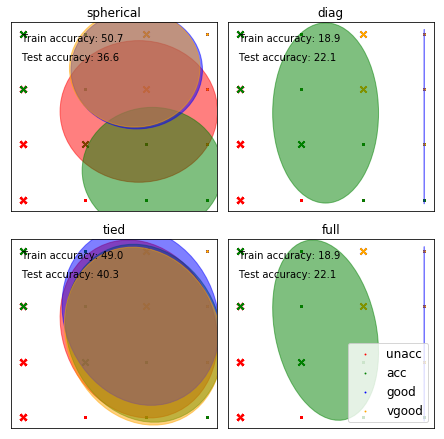

In [88]:
# Try GMMs using different types of covariances. K=4, iteration=20
estimators = dict((cov_type, GaussianMixture(n_components=n_classes,
                   covariance_type=cov_type, max_iter=20, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full'])

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)
for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = datalist_array[datalist_label == n]
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color,
                    label=datalist_label_names[n])
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))


plt.show()

C:\Users\Chenming\AppData\Roaming\Python\Python36\site-packages\sklearn\mixture\base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


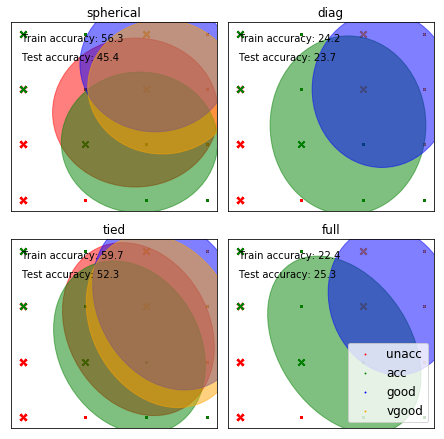

In [89]:
# Try GMMs using different types of covariances. K=4, iteration=2
estimators = dict((cov_type, GaussianMixture(n_components=n_classes,
                   covariance_type=cov_type, max_iter=2, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full'])

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)
for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = datalist_array[datalist_label == n]
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color,
                    label=datalist_label_names[n])
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))


plt.show()

C:\Users\Chenming\AppData\Roaming\Python\Python36\site-packages\sklearn\mixture\base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


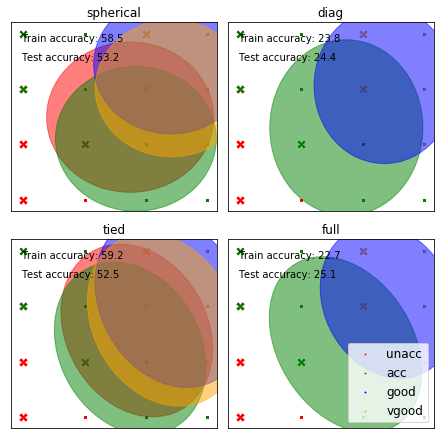

In [90]:
# Try GMMs using different types of covariances. k=4, iteration=1
estimators = dict((cov_type, GaussianMixture(n_components=n_classes,
                   covariance_type=cov_type, max_iter=1, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full'])

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)
for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = datalist_array[datalist_label == n]
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color,
                    label=datalist_label_names[n])
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))


plt.show()

C:\Users\Chenming\AppData\Roaming\Python\Python36\site-packages\sklearn\mixture\base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


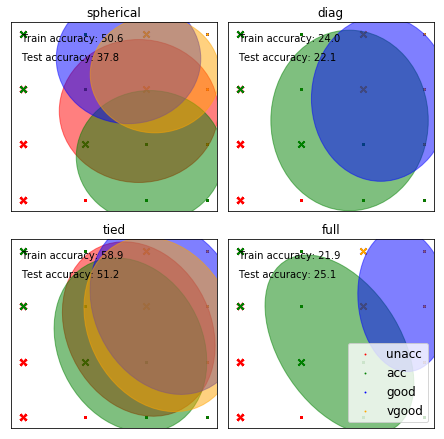

In [91]:
# Try GMMs using different types of covariances. k=4, iteration =5
estimators = dict((cov_type, GaussianMixture(n_components=n_classes,
                   covariance_type=cov_type, max_iter=5, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full'])

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)
for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = datalist_array[datalist_label == n]
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color,
                    label=datalist_label_names[n])
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))


plt.show()

C:\Users\Chenming\AppData\Roaming\Python\Python36\site-packages\sklearn\mixture\base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


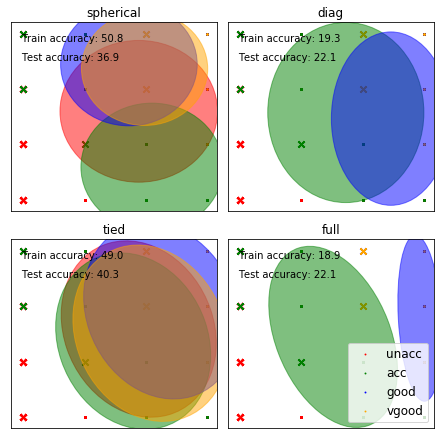

In [92]:
# Try GMMs using different types of covariances. k=4, iteration=10
estimators = dict((cov_type, GaussianMixture(n_components=n_classes,
                   covariance_type=cov_type, max_iter=10, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full'])

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)
for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = datalist_array[datalist_label == n]
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color,
                    label=datalist_label_names[n])
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))


plt.show()